In [16]:
import numpy as np 
import matplotlib
from matplotlib import pyplot as plt

def MHK2(x, y, s_y=None, s_x=None, label=None, scattercolor=None, linecolor=None, showline=None, xlabel=None, ylabel=None, title=None):
    array_x = np.array(x)
    x_ = array_x.mean()

    array_y = np.array(y)
    y_ = array_y.mean()

    array_xy = np.array(x * y)
    xy_ = array_xy.mean()

    array_x2 = np.array(x * x)
    x2_ = array_x2.mean()

    array_y2 = np.array(y * y)
    y2_ = array_y2.mean()

    k = (xy_ - x_ * y_) / (x2_ - x_ ** 2)

    b = y_ - k * x_

    Dyy = y2_ - y_ ** 2
    Dxx = x2_ - x_ ** 2

    sigma_k = ((Dyy / Dxx - k  ** 2) / (len(x) - 2)) ** 0.5

    sigma_b = sigma_k * ((x2_) ** 0.5)

    plt.grid(True)
    plt.minorticks_on()
    plt.grid(which = 'minor', alpha = 0.2)
    
    plt.errorbar(x, y, xerr=s_x, yerr=s_y, linestyle="None", color=scattercolor)
    plt.scatter(x, y, s=6, color = scattercolor, label=label)
    
    if showline == True: 
        x0 = np.array([min(x), max(x)])
        y0 = k * x0 + b
        plt.plot(x0,y0, 'k--', color=linecolor)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    print("k: ", k, "sigma_k: ", sigma_k, "b: ", b, "sigma_b: ", sigma_b)
    return(k, sigma_k, b, sigma_b)

k:  0.001930451127819549 sigma_k:  3.2472576517765104e-05 b:  6.363157894736901 sigma_b:  19.449690896531795
k:  0.0009212180451127819 sigma_k:  3.163518205755155e-05 b:  4.310526315789502 sigma_b:  18.948127264809767


/var/folders/qq/pjggzry53mq7xbvhcjr59g800000gp/T/ipykernel_79814/1325610137.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x0,y0, 'k--', color=linecolor)


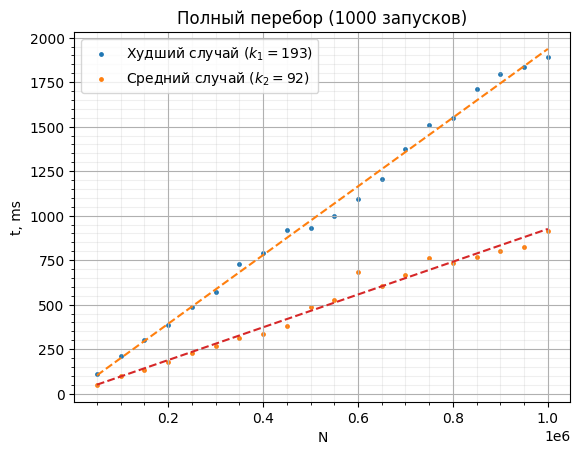

In [23]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

f1 = open('full_search.txt', 'r')
lines1 = f1.readlines()
t1 = np.array(list(map(int, lines1[0].split())))
N1 = np.array(list(map(int, lines1[1].split())))

f2 = open('full_search_average.txt', 'r')
lines2 = f2.readlines()
t2 = np.array(list(map(int, lines2[0].split())))
N2 = np.array(list(map(int, lines2[1].split())))
MHK2(N1, t1, showline = True, label=r"Худший случай ($k_1 = 193$)")
MHK2(N2, t2, showline = True, label=r"Средний случай ($k_2 = 92$)")
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'minor', alpha = 0.2)
plt.title("Полный перебор (1000 запусков)")
plt.xlabel("N")
plt.ylabel("t, ms")
plt.legend()

/var/folders/qq/pjggzry53mq7xbvhcjr59g800000gp/T/ipykernel_79814/1349882500.py:8: RuntimeWarning: divide by zero encountered in log2
  y = np.log2(x) * 21


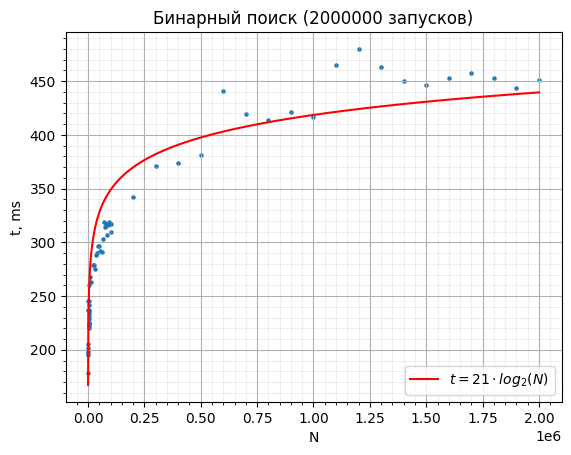

In [68]:
f3 = open('binary_search.txt', 'r')
lines3 = f3.readlines()
t3 = np.array(list(map(int, lines3[0].split())))
N3 = np.array(list(map(int, lines3[1].split())))
plt.scatter(N3, t3, s =5)
two3 = np.power(2.0, t3)
x = np.linspace(0,2000000, 8000)
y = np.log2(x) * 21
plt.plot(x, y, color=(1,0,0), label=r"$t = 21 \cdot log_{2}(N)$")
plt.grid(True)
plt.minorticks_on()
plt.grid(which = 'minor', alpha = 0.2)
plt.title("Бинарный поиск (2000000 запусков)")
plt.xlabel("N")
plt.ylabel("t, ms")
plt.legend(loc=4)

